# Microsoft Movie Magic! 

**Author:** Taylor Morton

## Overview

For this project, you will use exploratory data analysis to generate insights for a business stakeholder.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they dont know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

***
Questions to consider:
* **What are the business's main points related to this project?**

Microsoft has little to no experience in creating movies, and are hoping to produce some box office hits that will be profitable. 


* **How did you pick the data analysis question(s) that you did?**
  
  **Movie Gross** - To better understand how much money was brought in by movies. The company is wanting to know how to make movies that are successful at the box office. (includes domestic and foreign gross income)
  
  **Title and Genre** - To understand how the type of movie could indicate an easy start of success for the company. 
  
  
* **Why are these questions important from a business perspective?**
***

* **Independent Variables**: 

- Popularity & Vote Average, Release Date, Title, Gross
- D. Gross, F. Gross, Release Dates 



**Research Questions?**

Which release dates (months of the year) would I recommend to Microsoft for their new films? 


What genres of movies make the highest domestic and foreign gross income? 


Which movies have the largest return on investment? (comparing gross income to budget)

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [3]:
os.listdir('data/zippedData')

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [4]:
genres_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
genres_df.dropna(subset=['genres'], inplace=True)
genres_df['genres'] = genres_df['genres'].apply(lambda x: x.split(','))
genres_df = genres_df.explode('genres')
genres_df.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,Comedy
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Drama


In [5]:
genres_df.groupby('genres').mean()

,start_year,runtime_minutes
genres,,
Action,2014.689695,100.019729
Adult,2016.520000,86.285714
Adventure,2014.491261,85.782404
Animation,2014.883530,80.674520
Biography,2013.951502,74.129960
Comedy,2014.521689,93.920165
Crime,2014.646972,95.508631
Documentary,2014.406410,72.107879
Drama,2014.526713,94.281372


In [6]:
mo = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
mo.info()

#GenreIDs
#Popularity
#Release Date 
#Vote Average

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [7]:
#rt_movie_ = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', sep = '\t')
#rt_movie_.head(3)

In [8]:
gs = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
gs.info()

#Dgross
#Fgross
#Title?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
bud = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
bud.head(10)

#ReleaseDate
#Budget
#Gross
#Movie 

bud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

## Which Release Dates (months of the year) would I recommend to Microsoft for their new films? 

In [11]:
mo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [12]:
mo.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [13]:
mo['release_date']

0        2010-11-19
1        2010-03-26
2        2010-05-07
3        1995-11-22
4        2010-07-16
            ...    
26512    2018-10-13
26513    2018-05-01
26514    2018-10-01
26515    2018-06-22
26516    2018-10-05
Name: release_date, Length: 26517, dtype: object

In [14]:
print(mo['release_date'].dtype)

object


In [15]:
mo.loc[:5, 'release_date']

0    2010-11-19
1    2010-03-26
2    2010-05-07
3    1995-11-22
4    2010-07-16
5    2010-02-11
Name: release_date, dtype: object

In [16]:
mo['release_date'].head()

0    2010-11-19
1    2010-03-26
2    2010-05-07
3    1995-11-22
4    2010-07-16
Name: release_date, dtype: object

In [17]:
mo['release_date'].iloc[0] 

'2010-11-19'

In [18]:
pd.to_datetime(mo['release_date'], format='%Y/%m/%d').head(2)

0   2010-11-19
1   2010-03-26
Name: release_date, dtype: datetime64[ns]

In [19]:
mo['monthof']=pd.to_datetime(mo['release_date']).dt.month

In [20]:
mo['monthof']

0        11
1         3
2         5
3        11
4         7
         ..
26512    10
26513     5
26514    10
26515     6
26516    10
Name: monthof, Length: 26517, dtype: int64

In [21]:
mo['monthof'].mode()

0    1
dtype: int64

In [32]:
mo['popularity']

0        33.533
1        28.734
2        28.515
3        28.005
4        27.920
          ...  
26512     0.600
26513     0.600
26514     0.600
26515     0.600
26516     0.600
Name: popularity, Length: 26517, dtype: float64

In [81]:
mo.groupby(['monthof']).mean()

,Unnamed: 0,id,popularity,vote_average,vote_count
monthof,,,,,
1,12421.901980,289163.437101,2.180176,5.866762,65.612388
2,13681.524783,284874.361834,3.352600,5.958240,189.337670
3,14003.534497,289719.502909,3.052933,6.042810,168.189942
4,13902.661341,296493.706937,2.784293,6.117537,120.299299
5,13458.068633,293177.639678,3.123663,6.003539,230.502413
6,13376.954755,293923.416898,3.043683,6.067959,203.485688
7,13026.402261,291002.682846,3.585265,5.883710,304.916223
8,13138.877503,295222.210247,3.580677,5.908539,187.911661
9,13049.484099,296616.382067,3.265490,5.955300,167.389134


## What genres of movies make the highest domestic and foreign gross income?
Joins Genres DF + Gross

In [22]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [23]:
gs['domestic_gross']

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64

In [24]:
gs['foreign_gross']
#The end of this has some NaNs, so this may need to be further explored and cleaned 

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382          NaN
3383          NaN
3384          NaN
3385          NaN
3386          NaN
Name: foreign_gross, Length: 3387, dtype: object

In [25]:
genres_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
genres_df.dropna(subset=['genres'], inplace=True)
genres_df['genres'] = genres_df['genres'].apply(lambda x: x.split(','))
genres_df = genres_df.explode('genres')
genres_df.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama


In [26]:
joined_df = genres_df.merge(gs, left_on= 'original_title', right_on= 'title', how='inner')
#joined_df = genres_df.join(gs, how='outer')
#print(joined_df)
joined_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,Action,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0315642,Wazir,Wazir,2016,103.0,Crime,Wazir,Relbig.,1100000.0,NaN,2016
2,tt0315642,Wazir,Wazir,2016,103.0,Drama,Wazir,Relbig.,1100000.0,NaN,2016
3,tt0337692,On the Road,On the Road,2012,124.0,Adventure,On the Road,IFC,744000.0,8000000,2012
4,tt0337692,On the Road,On the Road,2012,124.0,Drama,On the Road,IFC,744000.0,8000000,2012
...,...,...,...,...,...,...,...,...,...,...,...
6222,tt8851262,Spring Fever,Spring Fever,2019,NaN,Horror,Spring Fever,Strand,10800.0,150000,2010
6223,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,Documentary,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000,2018
6224,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,Music,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000,2018
6225,tt9805754,Double Trouble,Double Trouble,2013,99.0,Comedy,Double Trouble,CL,44800.0,NaN,2012


In [27]:
joined_df.groupby(['genres']).mean().sort_values("domestic_gross")

,start_year,runtime_minutes,domestic_gross,year
genres,,,,
News,2013.166667,68.500000,3.640900e+06,2013.333333
War,2013.781250,113.666667,8.235853e+06,2014.375000
Documentary,2014.107143,76.906897,1.668892e+07,2013.902597
Romance,2013.443878,109.023499,1.720356e+07,2013.612245
Music,2014.188889,106.855556,1.916142e+07,2014.388889
Drama,2013.929932,108.716513,2.053186e+07,2014.066667
Biography,2014.429603,106.855596,2.268838e+07,2014.660650
History,2014.441441,106.693694,2.584890e+07,2014.603604
Crime,2013.686391,109.772455,2.631423e+07,2013.899408


#joined_df.groupby(['genres']).mean().sort_values("foreign_gross") needs to be cleaned

## Which movies have the highest ROI?

In [36]:
bud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [37]:
bud['production_budget']

0       $425,000,000
1       $410,600,000
2       $350,000,000
3       $330,600,000
4       $317,000,000
            ...     
5777          $7,000
5778          $6,000
5779          $5,000
5780          $1,400
5781          $1,100
Name: production_budget, Length: 5782, dtype: object

In [38]:
bud['domestic_gross']

0       $760,507,625
1       $241,063,875
2        $42,762,350
3       $459,005,868
4       $620,181,382
            ...     
5777              $0
5778         $48,482
5779          $1,338
5780              $0
5781        $181,041
Name: domestic_gross, Length: 5782, dtype: object

In [41]:
bud['worldwide_gross']

0       $2,776,345,279
1       $1,045,663,875
2         $149,762,350
3       $1,403,013,963
4       $1,316,721,747
             ...      
5777                $0
5778          $240,495
5779            $1,338
5780                $0
5781          $181,041
Name: worldwide_gross, Length: 5782, dtype: object

In [58]:
bud['release_date'].head()

0    Dec 18, 2009
1    May 20, 2011
2     Jun 7, 2019
3     May 1, 2015
4    Dec 15, 2017
Name: release_date, dtype: object

In [59]:
pd.to_datetime(bud['release_date']).head

<bound method NDFrame.head of 0      2009-12-18
1      2011-05-20
2      2019-06-07
3      2015-05-01
4      2017-12-15
          ...    
5777   2018-12-31
5778   1999-04-02
5779   2005-07-13
5780   2015-09-29
5781   2005-08-05
Name: release_date, Length: 5782, dtype: datetime64[ns]>

In [63]:
bud['monthof']=pd.to_datetime(bud['release_date']).dt.month
bud['monthof']

0       12
1        5
2        6
3        5
4       12
        ..
5777    12
5778     4
5779     7
5780     9
5781     8
Name: monthof, Length: 5782, dtype: int64

In [78]:
bud.groupby(['monthof','production_budget']).mean()

id
monthof production_budget           
1       $1,000,000         36.142857
        $1,039,000         10.000000
        $1,200,000         71.000000
        $1,250,000         54.500000
        $1,300,000         38.000000
...                              ...
12      $92,000,000        36.000000
        $94,000,000        26.500000
        $95,000,000        18.500000
        $950,000           31.000000
        $97,000,000        11.000000

[1821 rows x 1 columns]

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

### Which Release Dates (months of the year) would I recommend to Microsoft for their new films? 

In [84]:
mo.groupby(['monthof']).mean()

,Unnamed: 0,id,popularity,vote_average,vote_count
monthof,,,,,
1,12421.901980,289163.437101,2.180176,5.866762,65.612388
2,13681.524783,284874.361834,3.352600,5.958240,189.337670
3,14003.534497,289719.502909,3.052933,6.042810,168.189942
4,13902.661341,296493.706937,2.784293,6.117537,120.299299
5,13458.068633,293177.639678,3.123663,6.003539,230.502413
6,13376.954755,293923.416898,3.043683,6.067959,203.485688
7,13026.402261,291002.682846,3.585265,5.883710,304.916223
8,13138.877503,295222.210247,3.580677,5.908539,187.911661
9,13049.484099,296616.382067,3.265490,5.955300,167.389134


In [88]:
np.random.seed(400)
data = mo.groupby(['monthof']).mean()
data.head()

,Unnamed: 0,id,popularity,vote_average,vote_count
monthof,,,,,
1,12421.901980,289163.437101,2.180176,5.866762,65.612388
2,13681.524783,284874.361834,3.352600,5.958240,189.337670
3,14003.534497,289719.502909,3.052933,6.042810,168.189942
4,13902.661341,296493.706937,2.784293,6.117537,120.299299
5,13458.068633,293177.639678,3.123663,6.003539,230.502413


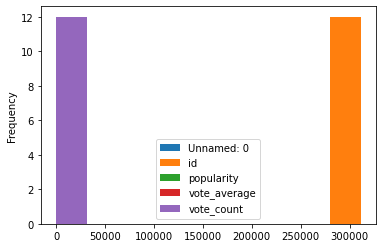

In [105]:
data.plot.hist(alpha = 1);

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***